# Importing Libraries:-

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

# Importing Data:-

In [2]:
df=pd.read_csv("globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')
df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
# To sets the maximum number of columns to be displayed
pd.set_option('Display.max_columns', None)

In [4]:
# To know the shape of the data totel no. of rows and columns
df.shape

(181691, 135)

In [5]:
# Check the datatype of columns
df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [6]:
# check the duplicates value
df.duplicated().sum()

0

In [7]:
# check out the null value
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [8]:
# Calculate the percentage of null values in each column
null_percentage = (df.isnull().sum() / len(df)) * 100

# Filter columns with more than 25% null values
columns_with_high_nulls = null_percentage[null_percentage > 25].index.tolist()

# Display the columns with more than 25% null values
print("Columns with more than 25% null values:")
print(columns_with_high_nulls)

Columns with more than 25% null values:
['approxdate', 'resolution', 'location', 'summary', 'alternative', 'alternative_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain2', 'guncertain3', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim', 'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt', 'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt', 'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt', 'weapdetail', 'nkillus', 'nkillter', 'nwoundus', 'nwoundte', 'propextent', 'propextent_txt', 'propvalue', 'propcomment', 'nhos

In [9]:
# Drop columns with more than 25% null values
df.drop(columns=columns_with_high_nulls, inplace=True)

In [10]:
# Display the remaining columns
print("Remaining columns:")
print(df.columns)

Remaining columns:
Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'nkill', 'nwound', 'property',
       'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')


In [11]:
# Now again checking the shape of the data
df.shape

(181691, 48)

In [12]:
# Now see top five records of the data 
df.head(5)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,13,Unknown,NaN,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,8,Incendiary,NaN,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1


In [13]:
# data["country"].value_counts()
df["country"].value_counts()

95     24636
153    14368
4      12731
92     11960
45      8306
       ...  
422        1
226        1
428        1
7          1
10         1
Name: country, Length: 205, dtype: int64

# TOP 10 country with Highest terrorism

In [14]:
df['country_txt'].value_counts().sort_values(ascending=False).head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country_txt, dtype: int64

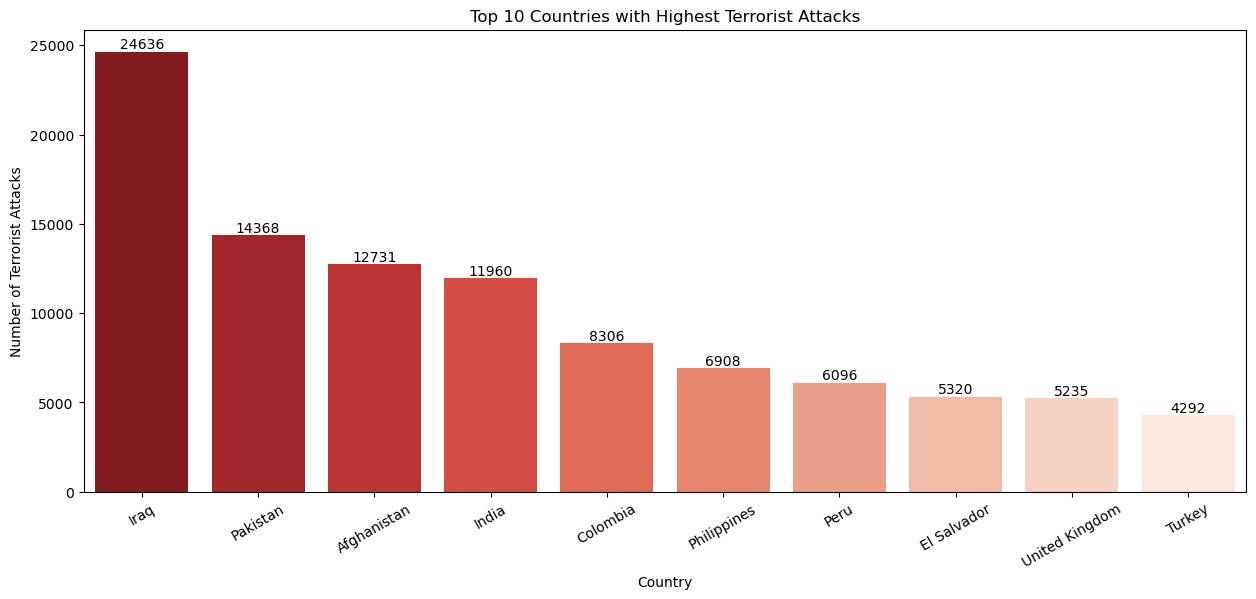

In [15]:
plt.figure(figsize=(15, 6))
custom_palette = sns.color_palette("Reds", len(df.country_txt.value_counts()[:10]))[::-1]
ax = sns.barplot(df.country_txt.value_counts()[:10].index, df.country_txt.value_counts()[:10].values, palette=custom_palette)
for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('Country')
plt.ylabel('Number of Terrorist Attacks')
plt.title('Top 10 Countries with Highest Terrorist Attacks')
plt.xticks(rotation=30)
plt.show()

# Sourcewise Terrorist Attack

In [16]:
df['dbsource'].value_counts()[:10]

START Primary Collection    78002
PGIS                        63740
ISVG                        17207
CETIS                       16163
CAIN                         1588
UMD Schmid 2012              1165
Hewitt Project               1005
UMD Algeria 2010-2012         848
UMD South Africa              449
UMD Sri Lanka 2011            405
Name: dbsource, dtype: int64

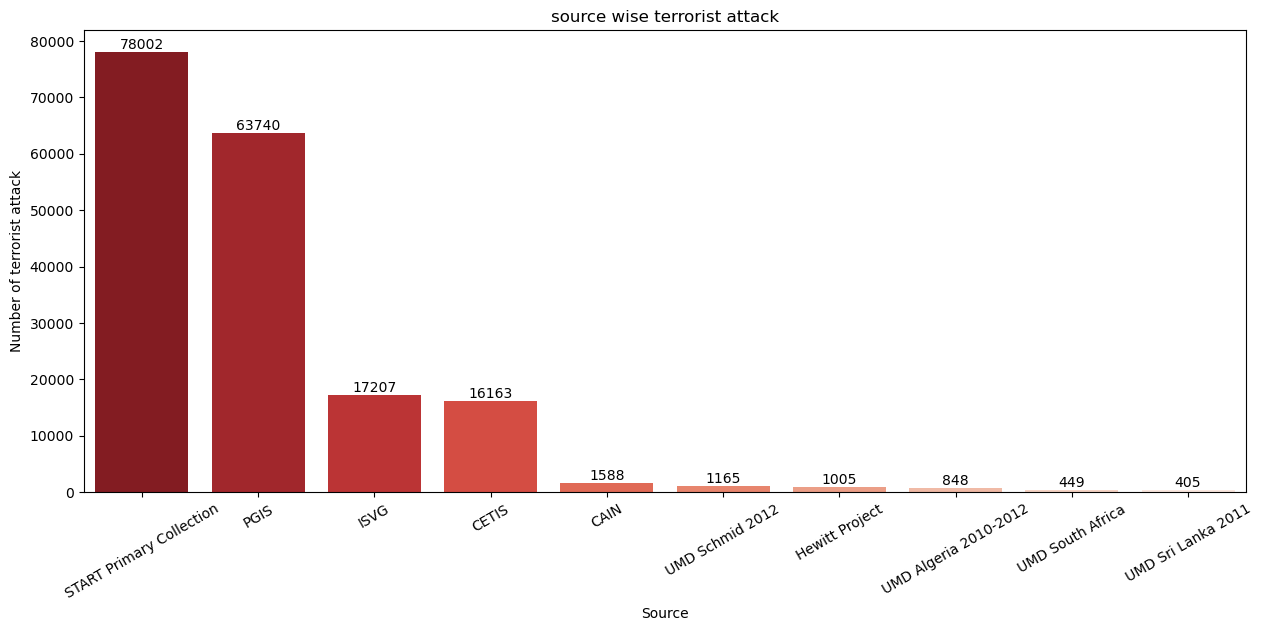

In [17]:
plt.figure(figsize=(15,6))
custom_palette = sns.color_palette("Reds", len(df.country_txt.value_counts()[:10]))[::-1]
ax=sns.barplot(df.dbsource.value_counts()[:10].index,df.dbsource.value_counts()[:10], palette=custom_palette)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Source')
plt.ylabel('Number of terrorist attack')
plt.title("source wise terrorist attack")
plt.xticks(rotation=30)
plt.show()

# Region with Highest terrorist attack

In [18]:
df["region_txt"].value_counts()[:10]

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: region_txt, dtype: int64

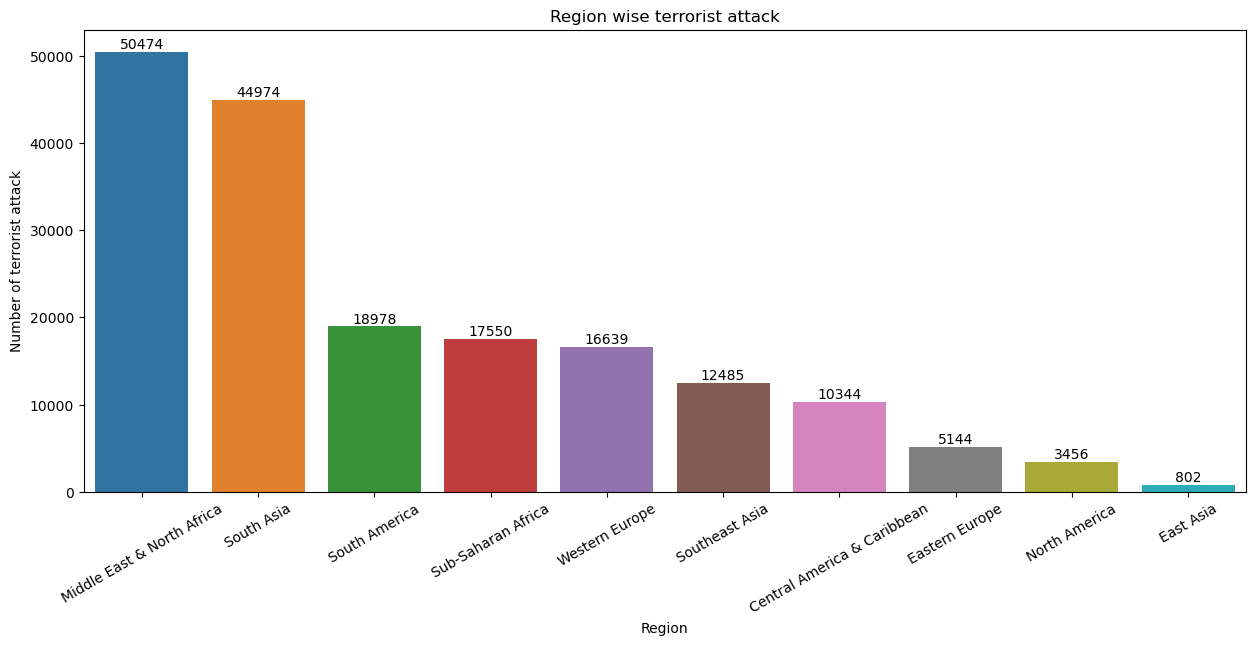

In [19]:
plt.figure(figsize=(15,6))
ax=sns.barplot(df.region_txt.value_counts()[:10].index,df.region_txt.value_counts()[:10].values)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Region')
plt.ylabel('Number of terrorist attack')
plt.title("Region wise terrorist attack")
plt.xticks(rotation=30)
plt.show()

In [20]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'nkill', 'nwound', 'property',
       'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

# Most common type of terrorist attack

In [21]:
df.attacktype1_txt.value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

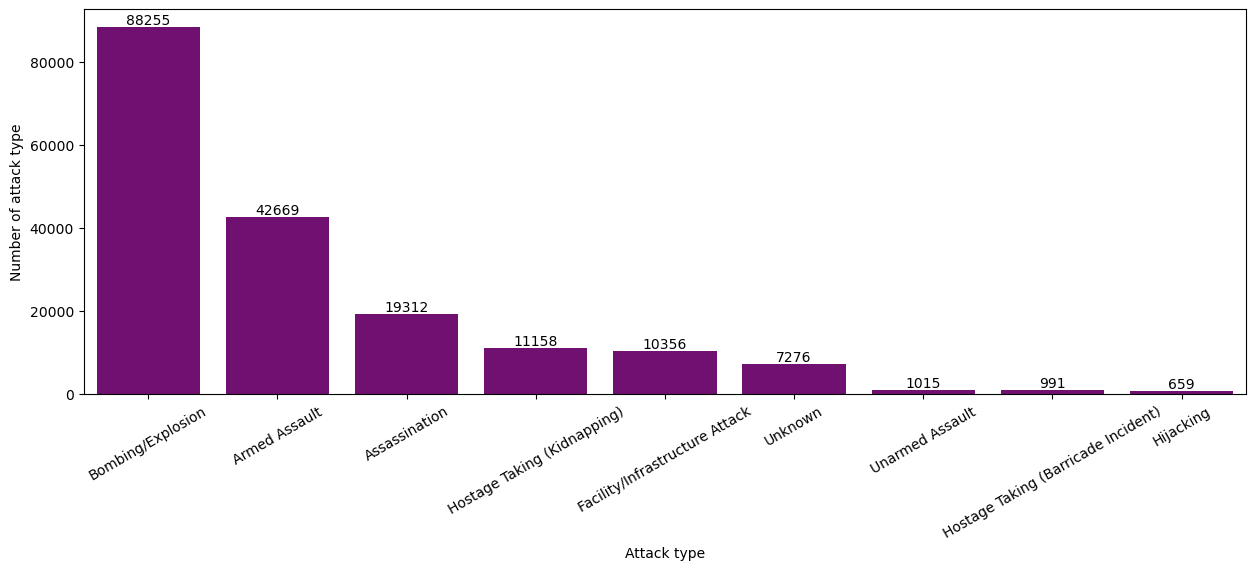

In [22]:
plt.figure(figsize=(15,5))
ax=sns.barplot(df.attacktype1_txt.value_counts()[:10].index,df.attacktype1_txt.value_counts()[:10].values,color="purple")
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Attack type")
plt.ylabel("Number of attack type")
plt.xticks(rotation=30)
plt.show()

# Most terrorist attack by different groups

In [23]:
df.gname.value_counts().head(10)

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: gname, dtype: int64

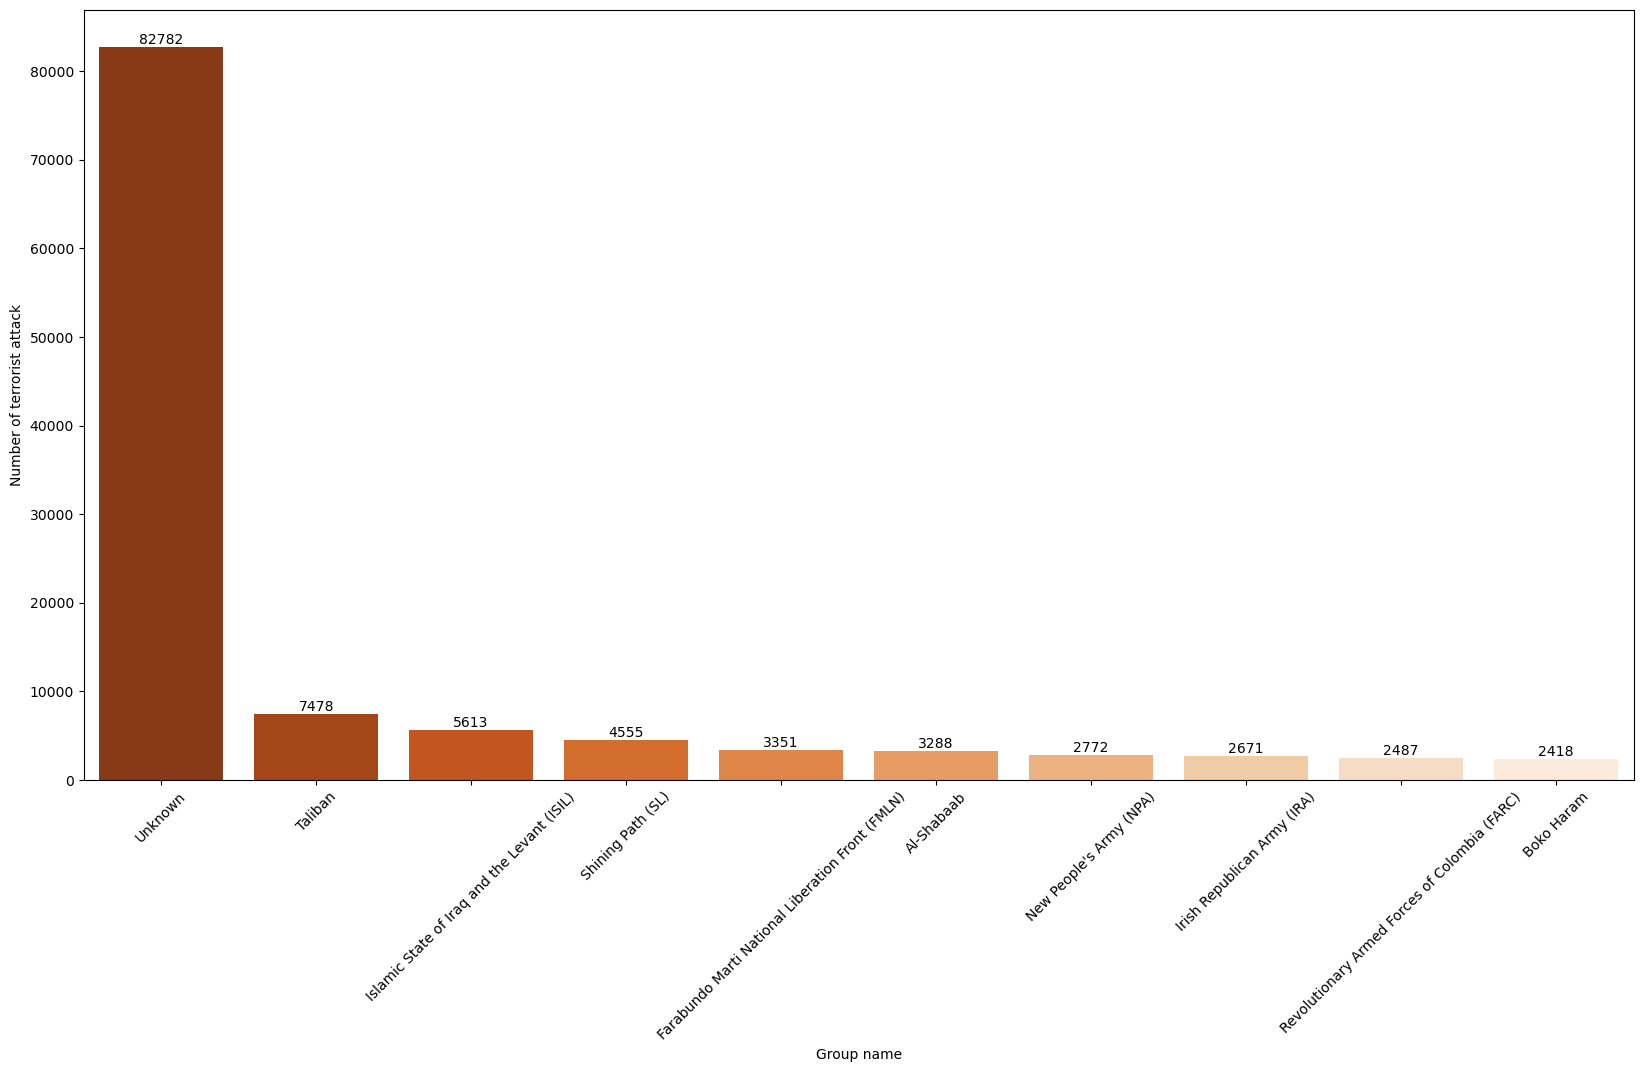

In [24]:
plt.figure(figsize=(20,10))
custom_palette = sns.color_palette("Oranges", len(df.country_txt.value_counts()[:10]))[::-1]
ax=sns.barplot(df.gname.value_counts()[:10].index,df.gname.value_counts()[:10].values, palette=custom_palette)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Group name")
plt.ylabel("Number of terrorist attack")
plt.xticks(rotation=45)
plt.show()

# Most type of weapon used in terrorist attack

In [25]:
df.weaptype1_txt.value_counts().head(10)

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Name: weaptype1_txt, dtype: int64

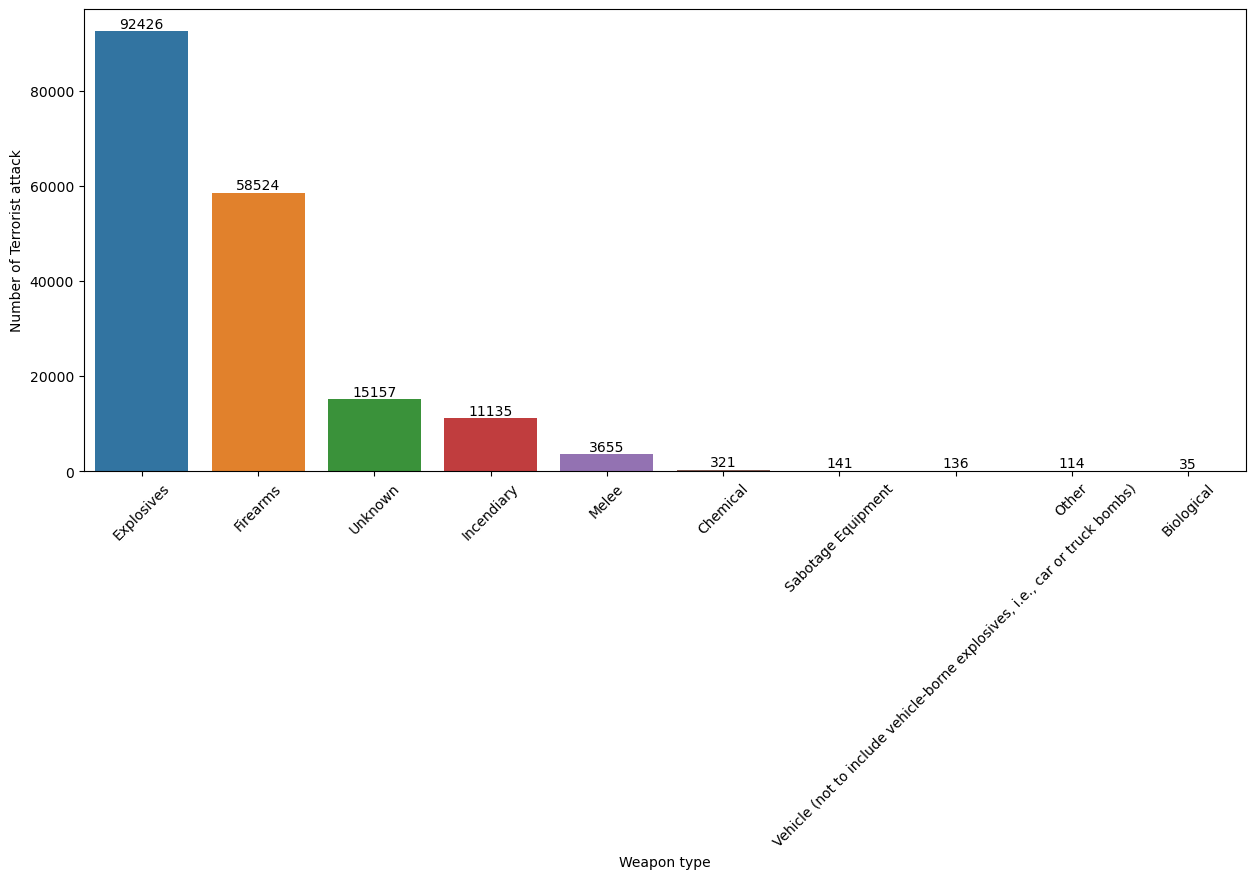

In [26]:
plt.figure(figsize=(15,6))
ax=sns.barplot(df.weaptype1_txt.value_counts().head(10).index,df.weaptype1_txt.value_counts().head(10))
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Weapon type")
plt.ylabel("Number of Terrorist attack")
plt.xticks(rotation=45)
plt.show()

# Terrorist Attack occured each year

In [27]:
Highest_value=df.groupby(['iyear'])['eventid'].count()[:10]

In [28]:
Highest_value

iyear
1970     651
1971     471
1972     568
1973     473
1974     581
1975     740
1976     923
1977    1319
1978    1526
1979    2662
Name: eventid, dtype: int64

In [29]:
df.head(1)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0


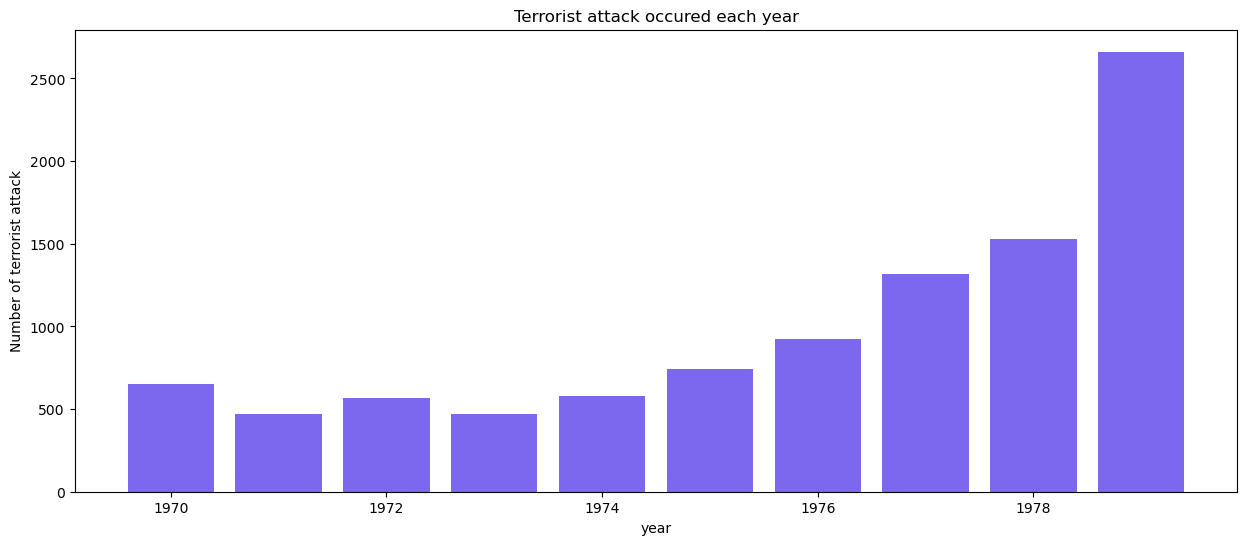

In [30]:
plt.figure(figsize=(15,6))
plt.bar(Highest_value.index, Highest_value.values,color='mediumslateblue')
plt.xlabel("year")
plt.ylabel("Number of terrorist attack")
plt.title("Terrorist attack occured each year")
plt.show()

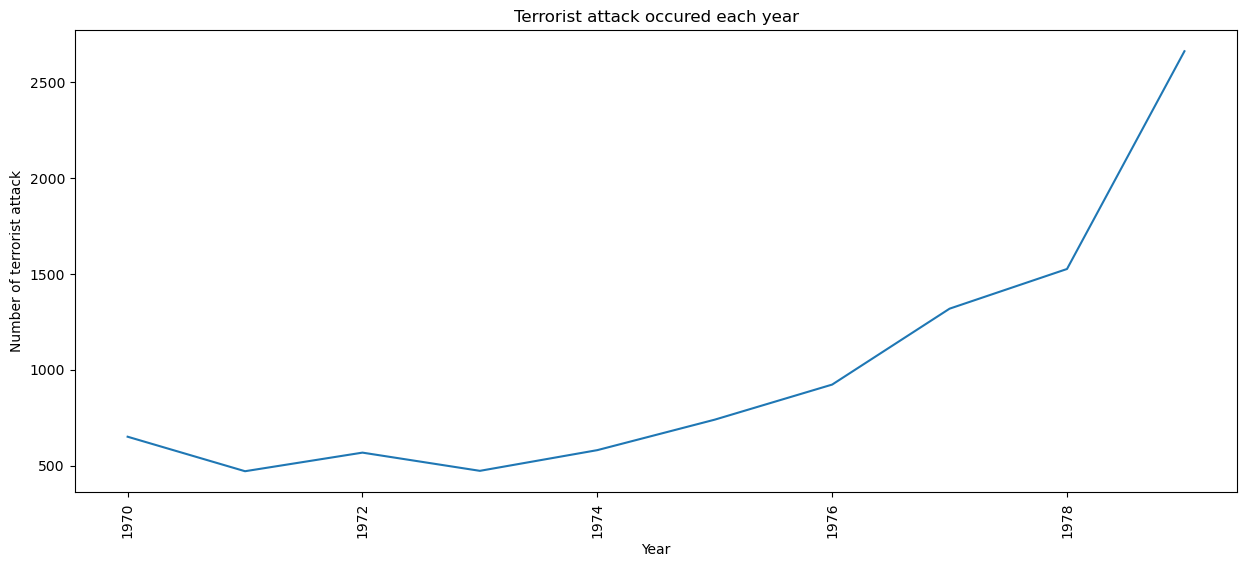

In [31]:
# highest value with label visibility
plt.figure(figsize=(15,6))
plt.plot(Highest_value.index,Highest_value.values)
plt.xlabel("Year")
plt.ylabel("Number of terrorist attack")
plt.title("Terrorist attack occured each year")
plt.xticks(rotation=90)
for i, v in enumerate(Highest_value.values):
    if v > 10000:
        plt.text(Highest_value.index[i], v+0.2, str(round(v,2)), fontsize=12, color='red', ha='center')
plt.show()

# Comparing terrorist attack before and after 2011

In [32]:
new_row=pd.DataFrame(data={
    'year':["Before 2011",'After 2011'],
    'value':[df[df.iyear<2011].shape[0],df[df.iyear>=2011].shape[0]]
})
new_row=new_row.set_index('year')
new_row

,value
year,
Before 2011,99702
After 2011,81989


<Figure size 1500x600 with 0 Axes>

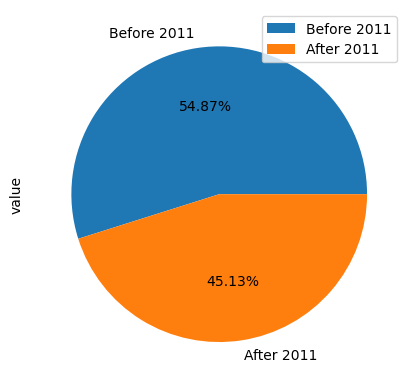

In [33]:
plt.figure(figsize=(15,6))
new_row.plot.pie(y='value',autopct='%0.2f%%')
plt.show()

# Analyzing terrorist attack after 2011

In [34]:
after_2011=df[df.iyear>2011]
after_2011.head(5)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
104778,201201010001,2012,1,1,0,153,Pakistan,6,South Asia,Balochistan,Quetta,30.200819,66.994354,1.0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,1,Business,2.0,Restaurant/Bar/Café,Unknown,Paan Shop,153.0,Pakistan,Unknown,0.0,0,6,Explosives,7.0,Grenade,0.0,12.0,1,0.0,START Primary Collection,-9,-9,0,-9
104779,201201010002,2012,1,1,0,104,Kenya,11,Sub-Saharan Africa,North Eastern,Garissa,-0.456120,39.646123,1.0,0,1,1,1,0.0,1.0,1,0,2,Armed Assault,1,Business,2.0,Restaurant/Bar/Café,Locus Pub,Bar,104.0,Kenya,Al-Shabaab,1.0,0,6,Explosives,7.0,Grenade,3.0,14.0,1,0.0,START Primary Collection,1,1,0,1
104780,201201010003,2012,1,1,0,153,Pakistan,6,South Asia,Balochistan,Sui,28.633307,69.190369,1.0,0,1,1,0,1.0,0.0,1,0,3,Bombing/Explosion,4,Military,39.0,Paramilitary,Frontier Corps (FC),Soldiers,153.0,Pakistan,Baloch Republican Army (BRA),0.0,0,6,Explosives,8.0,Landmine,4.0,3.0,1,0.0,START Primary Collection,0,0,0,0
104781,201201010004,2012,1,1,0,104,Kenya,11,Sub-Saharan Africa,North Eastern,Garissa,-0.456120,39.646123,1.0,0,1,1,1,0.0,1.0,1,0,2,Armed Assault,1,Business,2.0,Restaurant/Bar/Café,Unknown,Bar,104.0,Kenya,Al-Shabaab,1.0,0,6,Explosives,7.0,Grenade,2.0,14.0,1,0.0,START Primary Collection,1,1,0,1
104782,201201010005,2012,1,1,1,153,Pakistan,6,South Asia,Balochistan,Peer Chhatta,28.466667,67.283333,1.0,0,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Not Applicable,Civilians,153.0,Pakistan,Unknown,0.0,0,5,Firearms,5.0,Unknown Gun Type,0.0,0.0,0,1.0,START Primary Collection,-9,-9,0,-9


In [35]:
after_2011.region_txt.value_counts()

Middle East & North Africa     29839
South Asia                     25067
Sub-Saharan Africa             10499
Southeast Asia                  6026
Eastern Europe                  2228
Western Europe                  1566
South America                   1105
North America                    342
East Asia                        105
Central Asia                      62
Australasia & Oceania             46
Central America & Caribbean       28
Name: region_txt, dtype: int64

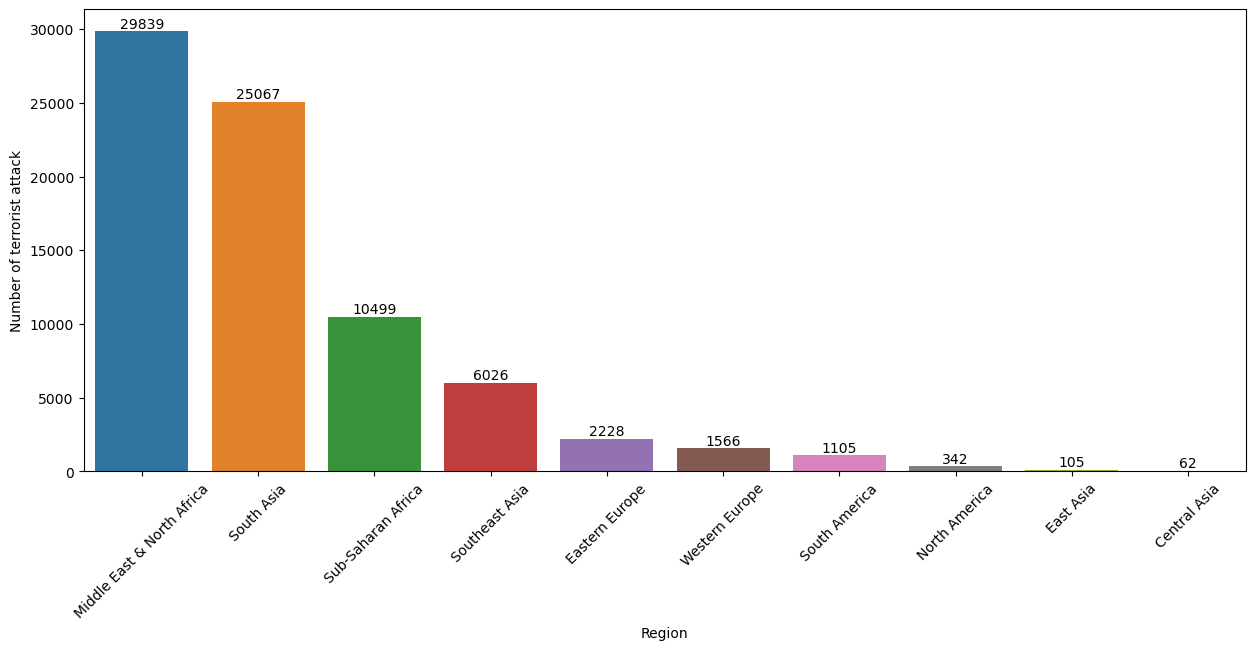

In [36]:
plt.figure(figsize=(15,6))
ax=sns.barplot(after_2011.region_txt.value_counts()[:10].index,after_2011.region_txt.value_counts()[:10].values)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Region")
plt.ylabel("Number of terrorist attack")
plt.xticks(rotation=45)
plt.show()

In [37]:
new_row = pd.DataFrame(data = {
    'region' : ['Middle East & North Africa','South Asia','Other Regions'],
    'value' : [after_2011.region_txt[after_2011.region_txt == 'Middle East & North Africa'].shape[0],after_2011.region_txt[after_2011.region_txt == 'South Asia'].shape[0],after_2011.region_txt[(after_2011.region_txt != 'South Asia') & (after_2011.region_txt != 'Middle East & North Africa')].shape[0]]
})
new_row = new_row.set_index('region')
new_row

,value
region,
Middle East & North Africa,29839
South Asia,25067
Other Regions,22007


<Figure size 600x600 with 0 Axes>

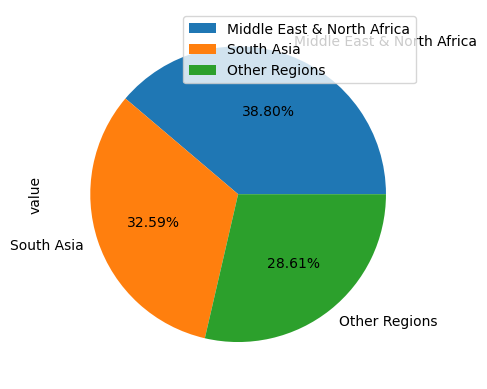

In [38]:
plt.figure(figsize=(6,6))
new_row.plot.pie(y='value',autopct='%.2f%%',legend='region')
plt.legend()

After 2011 more than 71% terrorist attack in middle east & north africa and south asia combining

# Analyzing Middle East & North Africa region after 2011

In [39]:
data_region_after_2011=after_2011[after_2011.region_txt=='Middle East & North Africa']
data_region_after_2011.country_txt.value_counts().head(10)

Iraq                        16799
Yemen                        2915
Libya                        2231
Syria                        2003
Egypt                        1971
Turkey                       1469
West Bank and Gaza Strip      706
Israel                        535
Lebanon                       448
Saudi Arabia                  307
Name: country_txt, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Iraq'),
  Text(1, 0, 'Yemen'),
  Text(2, 0, 'Libya'),
  Text(3, 0, 'Syria'),
  Text(4, 0, 'Egypt'),
  Text(5, 0, 'Turkey'),
  Text(6, 0, 'West Bank and Gaza Strip'),
  Text(7, 0, 'Israel'),
  Text(8, 0, 'Lebanon'),
  Text(9, 0, 'Saudi Arabia')])

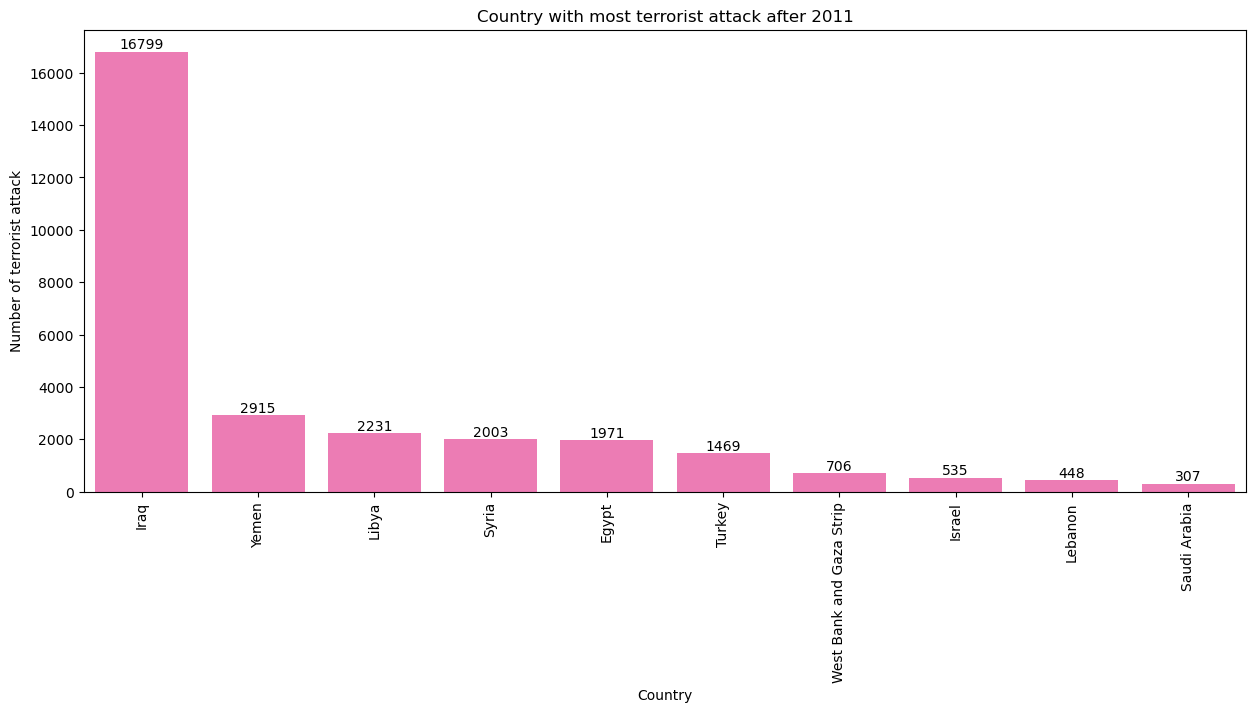

In [40]:
plt.figure(figsize=(15,6))
ax=sns.barplot(data_region_after_2011.country_txt.value_counts()[:10].index,data_region_after_2011.country_txt.value_counts()[:10].values,color='hotpink')
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Country")
plt.ylabel("Number of terrorist attack")
plt.title("Country with most terrorist attack after 2011")
plt.xticks(rotation=90)

In [41]:
new_row=pd.DataFrame(data={
    'Country':["Iraq","Other countries"],
    'value':[data_region_after_2011.country_txt.value_counts()[0],data_region_after_2011.country_txt.value_counts().values[1:].sum()]
})
new_row=new_row.set_index('Country')
new_row

,value
Country,
Iraq,16799
Other countries,13040


<AxesSubplot:ylabel='value'>

<Figure size 1500x600 with 0 Axes>

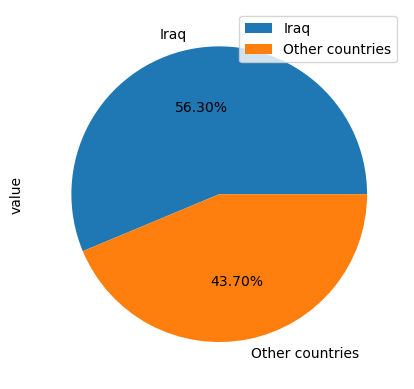

In [42]:
plt.figure(figsize=(15,6))
new_row.plot.pie(y='value',legend='Country',autopct='%.2f%%')

# Analyzing Iraq After 2011

In [43]:
Iraq_after_2011=data_region_after_2011[data_region_after_2011.country_txt=="Iraq"]
Iraq_after_2011.targtype1_txt.value_counts().head(10)

Private Citizens & Property       6031
Military                          2840
Police                            2426
Business                          1472
Unknown                           1248
Government (General)               961
Terrorists/Non-State Militia       689
Religious Figures/Institutions     321
Transportation                     236
Utilities                          235
Name: targtype1_txt, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Private Citizens & Property'),
  Text(1, 0, 'Military'),
  Text(2, 0, 'Police'),
  Text(3, 0, 'Business'),
  Text(4, 0, 'Unknown'),
  Text(5, 0, 'Government (General)'),
  Text(6, 0, 'Terrorists/Non-State Militia'),
  Text(7, 0, 'Religious Figures/Institutions'),
  Text(8, 0, 'Transportation'),
  Text(9, 0, 'Utilities')])

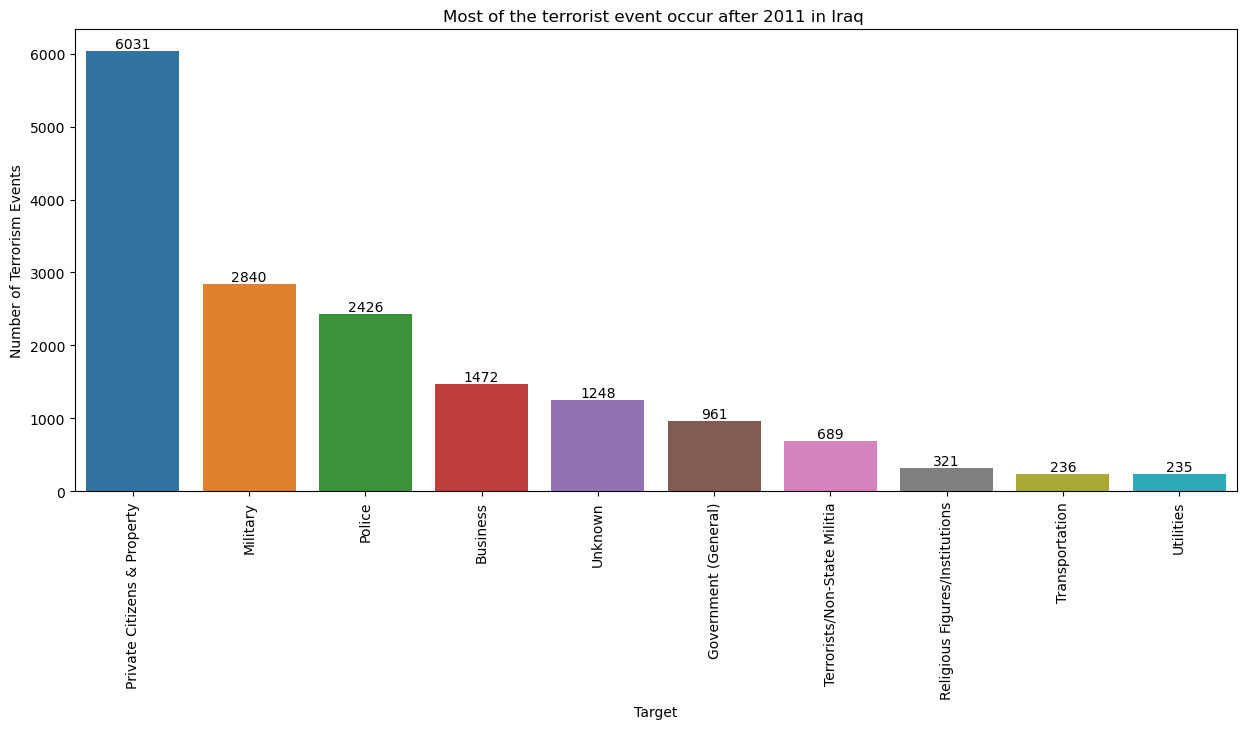

In [44]:
plt.figure(figsize=(15,6))
ax=sns.barplot(Iraq_after_2011.targtype1_txt.value_counts()[:10].index,Iraq_after_2011.targtype1_txt.value_counts()[:10])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Target")
plt.ylabel("Number of Terrorism Events")
plt.title("Most of the terrorist event occur after 2011 in Iraq ")
plt.xticks(rotation=90)

In [45]:
new_row = pd.DataFrame(data = {
    'target' : ['Private Citizens & Property','Other Targets'],
    'value' : [Iraq_after_2011[Iraq_after_2011.targtype1_txt == 'Private Citizens & Property'].shape[0],Iraq_after_2011[Iraq_after_2011.country_txt != 'Private Citizens & Property'].shape[0]]
})
new_row = new_row.set_index('target')
new_row

,value
target,
Private Citizens & Property,6031
Other Targets,16799


,value
target,
Private Citizens & Property,6031
Other Targets,16799


<Figure size 1500x600 with 0 Axes>

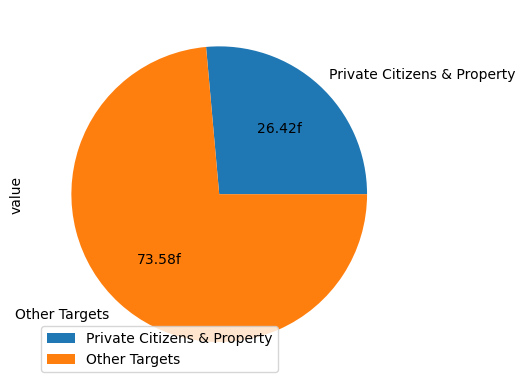

In [46]:
plt.figure(figsize=(15,6))
new_row.plot.pie(y='value',legend="target",autopct='%.2ff')
new_row

As we can see that after 2011, in Iraq more than 26 % terrorist attack target were "Private citizen & Property"

# Lets compare Terrorist Attack India & Pakistan

In [47]:
data_india=df[df.country_txt=="India"]
data_india.head(5)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
1186,197202220004,1972,2,22,0,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,1,1,1,0.0,0.0,1,0,4,Hijacking,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Lufthansa,B-747,75.0,Germany,Palestinians,0.0,0,6,Explosives,16.0,Unknown Explosive Type,0.0,0.0,0,1.0,Hijacking DB,1,1,1,1
2764,197501190004,1975,1,2,0,92,India,6,South Asia,Bihar,Samastipur,25.863042,85.781004,1.0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,2,Government (General),18.0,"Government Personnel (excluding police, military)",Railway Minister of India and legislator,Lalit Narayan Mishra and a legislator,92.0,India,Ananda Marga,1.0,0,6,Explosives,16.0,Unknown Explosive Type,4.0,0.0,0,0.0,UMD Encyclopedia of World Terrorism 2012,0,0,0,0
3857,197605260001,1976,5,26,0,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,6,Airports & Aircraft,44.0,Airport,NaN,New Delhi airport,92.0,India,Unknown,0.0,0,6,Explosives,16.0,Unknown Explosive Type,0.0,0.0,1,0.0,PGIS,-9,-9,0,-9
5327,197709280004,1977,9,28,0,92,India,6,South Asia,Maharashtra,Bombay,19.075984,72.877656,1.0,0,1,1,1,0.0,0.0,1,0,4,Hijacking,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Japan Airlines,DC-8,101.0,Japan,Japanese Red Army (JRA),0.0,0,5,Firearms,5.0,Unknown Gun Type,0.0,0.0,0,1.0,Hijacking DB,1,1,1,1
7337,197901130004,1979,1,13,0,92,India,6,South Asia,Assam,Unknown,26.200605,92.937574,4.0,0,1,1,1,-9.0,0.0,1,0,2,Armed Assault,3,Police,23.0,Police Patrol (including vehicles and convoys),Police,patrol,92.0,India,Naga People,0.0,0,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,NaN,NaN,1,0.0,PGIS,0,0,0,0


In [48]:
data_pakistan=df[df.country_txt=="Pakistan"]
data_pakistan.head(5)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
585,197011010001,1970,11,1,0,153,Pakistan,6,South Asia,Sindh,Karachi,24.891115,67.143311,1.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Polish Ministry of Foreign Affairs,Deputy Foreign Minister: Zygfryd Wolniak,161.0,Poland,Unknown,0.0,0,10,Vehicle (not to include vehicle-borne explosiv...,NaN,NaN,4.0,20.0,0,0.0,PGIS,-9,-9,1,1
2217,197402020001,1974,2,2,1,153,Pakistan,6,South Asia,Sindh,Karachi,24.891115,67.143311,1.0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,11,Maritime,58.0,Commercial Maritime,NaN,Greek Freighter in Karachi,78.0,Greece,Muslim Guerrillas,0.0,0,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,0.0,0.0,0,1.0,PGIS,-9,-9,1,1
2705,197412090001,1974,12,9,0,153,Pakistan,6,South Asia,North-West Frontier Province,Peshawar,34.006004,71.537430,1.0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,USIS Center,217.0,United States,Unknown,0.0,0,6,Explosives,16.0,Unknown Explosive Type,0.0,2.0,1,0.0,PGIS,-9,-9,1,1
2744,197500000001,1975,0,0,0,153,Pakistan,6,South Asia,Punjab,Rawalpindi,33.594013,73.069077,1.0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,6,Airports & Aircraft,42.0,Aircraft (not at an airport),NaN,Pakistan Airlines Boeing 707,153.0,Pakistan,Unknown,0.0,0,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,0,-9
2795,197502080001,1975,2,8,0,153,Pakistan,6,South Asia,North-West Frontier Province,Peshawar,34.006004,71.537430,1.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,2,Government (General),15.0,Politician or Political Party Movement/Meeting...,Pakistan Govt,"Hayat Mohammed Khan Sherpao, home minister",153.0,Pakistan,National Awami Party,0.0,0,5,Firearms,3.0,Handgun,1.0,0.0,0,0.0,PGIS,0,0,0,0


In [49]:
new_row = pd.DataFrame(data = {
    'country' : ['India','Pakistan','Other Countries'],
    'value' : [data_india.shape[0],data_pakistan.shape[0],df[(df.region_txt == 'South Asia') & (df.country_txt != 'India') & (df.country_txt != 'Pakistan')].shape[0]]
})
new_row = new_row.set_index('country')
new_row

,value
country,
India,11960
Pakistan,14368
Other Countries,18646


<AxesSubplot:ylabel='value'>

<Figure size 500x500 with 0 Axes>

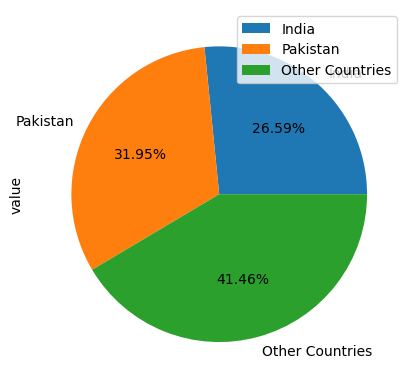

In [50]:
plt.figure(figsize=(5,5))
new_row.plot.pie(y="value",legend='Country',autopct='%.2f%%')

More than 58% terrorist attack from south asia from India and pakistan only

In [51]:
india_year_wise_values = data_india.groupby(['iyear'])['eventid'].count()
india_year_wise_values

iyear
1972       1
1975       1
1976       1
1977       1
1979      20
1980      10
1981      16
1982      13
1983      47
1984     159
1985      39
1986      96
1987     166
1988     358
1989     324
1990     349
1991     339
1992     237
1994     107
1995     179
1996     213
1997     193
1998      61
1999     112
2000     180
2001     234
2002     184
2003     196
2004     108
2005     146
2006     167
2007     149
2008     534
2009     672
2010     663
2011     645
2012     611
2013     694
2014     860
2015     884
2016    1025
2017     966
Name: eventid, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, '1972'),
  Text(1, 0, '1975'),
  Text(2, 0, '1976'),
  Text(3, 0, '1977'),
  Text(4, 0, '1979'),
  Text(5, 0, '1980'),
  Text(6, 0, '1981'),
  Text(7, 0, '1982'),
  Text(8, 0, '1983'),
  Text(9, 0, '1984'),
  Text(10, 0, '1985'),
  Text(11, 0, '1986'),
  Text(12, 0, '1987'),
  Text(13, 0, '1988'),
  Text(14, 0, '1989'),
  Text(15, 0, '1990'),
  Text(16, 0, '1991'),
  Text(17, 0, '1992'),
  Text(18, 0, '1994'),
  Text(19, 0, '1995'),
  Text(20, 0, '1996'),
  Text(21, 0, '1997'),
  Text(22, 0, '1998'),
  Text(23, 0, '1999'),
  Text(24, 0, '2000'),
  Text(25, 0, '2001'),
  Text(26, 0, '2002'),
  Text(27, 0, '2003'),
  Text(28, 0, '2004'),
  Text(29, 0, '2005'),
  Text(30, 0, '2006'),
  Text(31, 0, '2007'),
  Text(32, 0, '2008'),
  Text(33, 0, '2009'),
  Text(34, 0, '2010'),
  Text(35, 

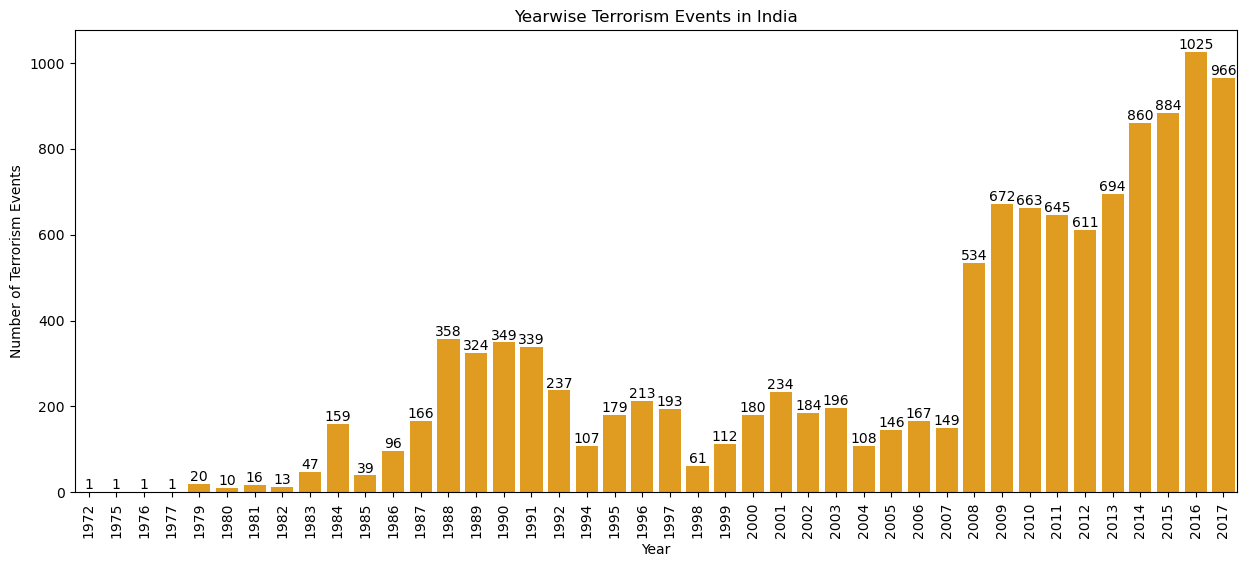

In [52]:
plt.figure(figsize=(15,6))
ax=sns.barplot(india_year_wise_values.index, india_year_wise_values.values,color='orange')
for i in ax.containers:
    ax.bar_label(i)
# set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Number of Terrorism Events')
plt.title('Yearwise Terrorism Events in India')
plt.xticks(rotation=90)

In [53]:
pakistan_year_wise_values = data_pakistan.groupby(['iyear'])['eventid'].count()
pakistan_year_wise_values

iyear
1970       1
1974       2
1975       2
1976       3
1978       2
1979       7
1980       1
1981       4
1982       4
1983       9
1984       3
1985       2
1986      24
1987      60
1988      44
1989      45
1990      87
1991     150
1992      85
1994     154
1995     666
1996     180
1997     206
1998      37
1999      39
2000      49
2001      53
2002      46
2003      29
2004      67
2005      77
2006     164
2007     260
2008     568
2009     667
2010     713
2011    1012
2012    1654
2013    2215
2014    2151
2015    1243
2016     864
2017     719
Name: eventid, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 [Text(0, 0, '1970'),
  Text(1, 0, '1974'),
  Text(2, 0, '1975'),
  Text(3, 0, '1976'),
  Text(4, 0, '1978'),
  Text(5, 0, '1979'),
  Text(6, 0, '1980'),
  Text(7, 0, '1981'),
  Text(8, 0, '1982'),
  Text(9, 0, '1983'),
  Text(10, 0, '1984'),
  Text(11, 0, '1985'),
  Text(12, 0, '1986'),
  Text(13, 0, '1987'),
  Text(14, 0, '1988'),
  Text(15, 0, '1989'),
  Text(16, 0, '1990'),
  Text(17, 0, '1991'),
  Text(18, 0, '1992'),
  Text(19, 0, '1994'),
  Text(20, 0, '1995'),
  Text(21, 0, '1996'),
  Text(22, 0, '1997'),
  Text(23, 0, '1998'),
  Text(24, 0, '1999'),
  Text(25, 0, '2000'),
  Text(26, 0, '2001'),
  Text(27, 0, '2002'),
  Text(28, 0, '2003'),
  Text(29, 0, '2004'),
  Text(30, 0, '2005'),
  Text(31, 0, '2006'),
  Text(32, 0, '2007'),
  Text(33, 0, '2008'),
  Text(34, 0, '2009'),
  Text(

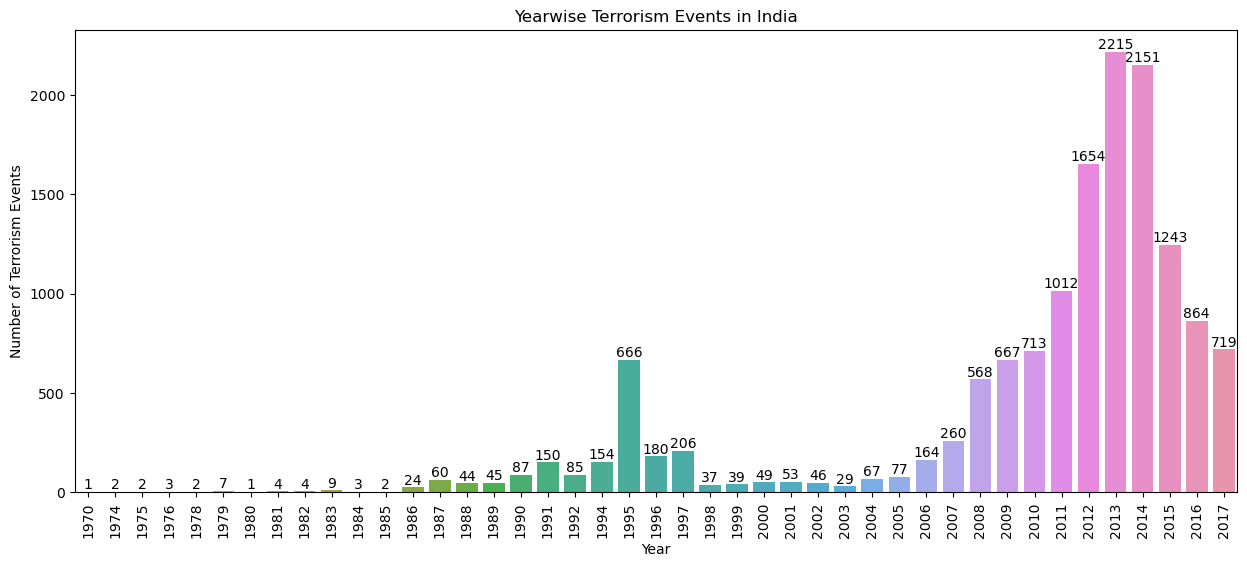

In [54]:
plt.figure(figsize=(15,6))
ax=sns.barplot(pakistan_year_wise_values.index, pakistan_year_wise_values.values)
for i in ax.containers:
    ax.bar_label(i)
# set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Number of Terrorism Events')
plt.title('Yearwise Terrorism Events in India')
plt.xticks(rotation=90)

In [55]:
data_india_pakistan=pd.DataFrame({'India':india_year_wise_values,'Pakistan':pakistan_year_wise_values})
data_india_pakistan.head(10)

,India,Pakistan
iyear,,
1970,NaN,1.0
1972,1.0,NaN
1974,NaN,2.0
1975,1.0,2.0
1976,1.0,3.0
1977,1.0,NaN
1978,NaN,2.0
1979,20.0,7.0
1980,10.0,1.0


Text(0.5, 1.0, 'Yearwise terrorist event in India and pakistan')

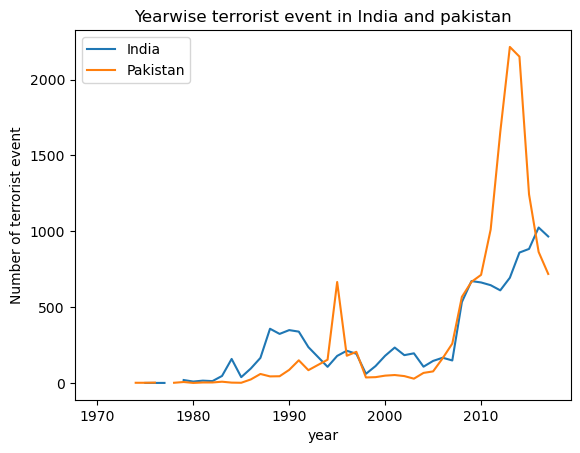

In [56]:
data_india_pakistan.plot()
plt.xlabel('year')
plt.ylabel("Number of terrorist event")
plt.title("Yearwise terrorist event in India and pakistan")

In India,there are moderate number of terrorist attack around 1990's but after 2007 attack arised rising and after ther kept increase year by year

In pakistan there are spike in 1995 for number of terrorist attack but 2013 -2014 highest peak where count were more than 2000.

In [57]:
data_before_2011=df[df.iyear<2011]
data_before_2011.head(5)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,13,Unknown,NaN,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,8,Incendiary,NaN,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1


In [58]:
data_after_2011=df[df.iyear>2011]
data_after_2011.head(5)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
104778,201201010001,2012,1,1,0,153,Pakistan,6,South Asia,Balochistan,Quetta,30.200819,66.994354,1.0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,1,Business,2.0,Restaurant/Bar/Café,Unknown,Paan Shop,153.0,Pakistan,Unknown,0.0,0,6,Explosives,7.0,Grenade,0.0,12.0,1,0.0,START Primary Collection,-9,-9,0,-9
104779,201201010002,2012,1,1,0,104,Kenya,11,Sub-Saharan Africa,North Eastern,Garissa,-0.456120,39.646123,1.0,0,1,1,1,0.0,1.0,1,0,2,Armed Assault,1,Business,2.0,Restaurant/Bar/Café,Locus Pub,Bar,104.0,Kenya,Al-Shabaab,1.0,0,6,Explosives,7.0,Grenade,3.0,14.0,1,0.0,START Primary Collection,1,1,0,1
104780,201201010003,2012,1,1,0,153,Pakistan,6,South Asia,Balochistan,Sui,28.633307,69.190369,1.0,0,1,1,0,1.0,0.0,1,0,3,Bombing/Explosion,4,Military,39.0,Paramilitary,Frontier Corps (FC),Soldiers,153.0,Pakistan,Baloch Republican Army (BRA),0.0,0,6,Explosives,8.0,Landmine,4.0,3.0,1,0.0,START Primary Collection,0,0,0,0
104781,201201010004,2012,1,1,0,104,Kenya,11,Sub-Saharan Africa,North Eastern,Garissa,-0.456120,39.646123,1.0,0,1,1,1,0.0,1.0,1,0,2,Armed Assault,1,Business,2.0,Restaurant/Bar/Café,Unknown,Bar,104.0,Kenya,Al-Shabaab,1.0,0,6,Explosives,7.0,Grenade,2.0,14.0,1,0.0,START Primary Collection,1,1,0,1
104782,201201010005,2012,1,1,1,153,Pakistan,6,South Asia,Balochistan,Peer Chhatta,28.466667,67.283333,1.0,0,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Not Applicable,Civilians,153.0,Pakistan,Unknown,0.0,0,5,Firearms,5.0,Unknown Gun Type,0.0,0.0,0,1.0,START Primary Collection,-9,-9,0,-9


# Before_2011

In [59]:
new_row=pd.DataFrame(data={
    'Country':["India","Pakistan","other country"],
    'value':[data_before_2011[data_before_2011.country_txt == "India"].shape[0],data_before_2011[data_before_2011.country_txt == "Pakistan"].shape[0],data_before_2011[(data_before_2011.region_txt == 'South Asia') & (data_before_2011.country_txt != 'India') & (data_before_2011.country_txt != 'Pakistan')].shape[0]]
})
new_row=new_row.set_index('Country')
new_row

,value
Country,
India,6275
Pakistan,4510
other country,6984


<AxesSubplot:ylabel='value'>

<Figure size 1500x600 with 0 Axes>

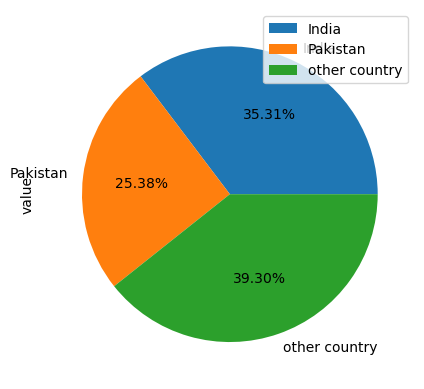

In [60]:
plt.figure(figsize=(15,6))
new_row.plot.pie(y='value',legend='country',autopct='%.2f%%')

# After_2011 

In [61]:
new_row = pd.DataFrame(data = {
    'country' : ['India','Pakistan','Other Countries'],
    'value' : [data_after_2011[data_after_2011.country_txt == "India"].shape[0],data_after_2011[data_after_2011.country_txt == "Pakistan"].shape[0],data_after_2011[(data_after_2011.region_txt == 'South Asia') & (data_after_2011.country_txt != 'India') & (data_after_2011.country_txt != 'Pakistan')].shape[0]]
})
new_row = new_row.set_index('country')
new_row

,value
country,
India,5040
Pakistan,8846
Other Countries,11181


<AxesSubplot:ylabel='value'>

<Figure size 1500x600 with 0 Axes>

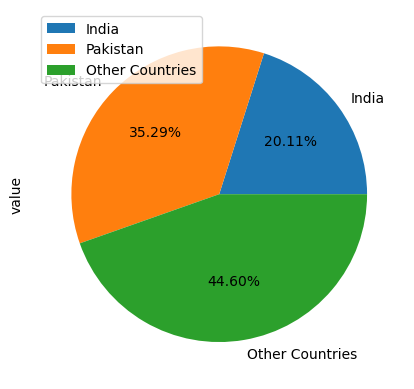

In [62]:
plt.figure(figsize=(15,6))
new_row.plot.pie(y='value',legend='country',autopct='%.2f%%')

when we compare before 2011 and after 2011 terrorist attack, we observed that in india reduce the attack from 35% to 21% but in the pakistan increase the number of attack 25 % to 35.29%

In [63]:
data_india.targtype1_txt.value_counts()[:10]

Private Citizens & Property       3144
Police                            2299
Government (General)              1727
Business                          1131
Military                           916
Transportation                     831
Unknown                            598
Educational Institution            297
Violent Political Party            234
Religious Figures/Institutions     214
Name: targtype1_txt, dtype: int64

In [64]:
data_india.attacktype1_txt.value_counts().head(10)

Bombing/Explosion                      4825
Armed Assault                          3184
Assassination                          1229
Hostage Taking (Kidnapping)            1184
Facility/Infrastructure Attack          996
Unknown                                 312
Unarmed Assault                         143
Hostage Taking (Barricade Incident)      44
Hijacking                                43
Name: attacktype1_txt, dtype: int64

In [65]:
data_india.gname.value_counts().head(10)

Unknown                                           4263
Communist Party of India - Maoist (CPI-Maoist)    1877
Maoists                                           1396
Sikh Extremists                                    710
United Liberation Front of Assam (ULFA)            357
Hizbul Mujahideen (HM)                             199
Lashkar-e-Taiba (LeT)                              187
National Democratic Front of Bodoland (NDFB)       174
Garo National Liberation Army                      166
Muslim Separatists                                 118
Name: gname, dtype: int64

In [66]:
data_pakistan.targtype1_txt.value_counts()[:10]

Private Citizens & Property       3456
Police                            1915
Military                          1730
Government (General)              1167
Business                          1165
Educational Institution            953
Unknown                            829
Transportation                     687
Utilities                          636
Religious Figures/Institutions     545
Name: targtype1_txt, dtype: int64

In [67]:
data_pakistan.gname.value_counts()[:10]

Unknown                                  10891
Tehrik-i-Taliban Pakistan (TTP)           1335
Baloch Republican Army (BRA)               312
Baloch Liberation Front (BLF)              185
Baloch Liberation Army (BLA)               181
Muttahida Qami Movement (MQM)              174
Lashkar-e-Jhangvi                          135
Lashkar-e-Islam (Pakistan)                 124
Khorasan Chapter of the Islamic State       96
United Baloch Army (UBA)                    89
Name: gname, dtype: int64

In [68]:
data_pakistan.attacktype1_txt.value_counts()[:10]

Bombing/Explosion                      7613
Armed Assault                          3859
Assassination                          1406
Hostage Taking (Kidnapping)             823
Facility/Infrastructure Attack          300
Unknown                                 236
Unarmed Assault                          77
Hostage Taking (Barricade Incident)      35
Hijacking                                19
Name: attacktype1_txt, dtype: int64